In [2]:
# import pymssql
# import pymysql
import time
import datetime
import numpy as np
from datetime import datetime as dt
from tqdm import *
from datetime import datetime as dt
from tqdm import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
dts = pd.date_range(start=pd.Timestamp("2015-06-01 16:19:00"),
                   end=pd.Timestamp("2015-06-01 16:30:00"), freq='1min')
sids = [1001,1001,1001,1001,1001,1001,1002,1002,1002,1002,1002,1002]
mvs = [0.1,0.2,0.3,0.4,0,3,0.4,0.7,0.6,0.9,0.7,0.5]

In [114]:
len(dts),len(sids),len(mvs)

(12, 12, 12)

In [111]:
dts

DatetimeIndex(['2015-06-01 16:19:00', '2015-06-01 16:20:00',
               '2015-06-01 16:21:00', '2015-06-01 16:22:00',
               '2015-06-01 16:23:00', '2015-06-01 16:24:00',
               '2015-06-01 16:25:00'],
              dtype='datetime64[ns]', freq='T')

In [115]:
df = pd.DataFrame({"SensorID":sids, 
 "Time":dts,
  'MonitorValue':mvs},
  columns =['SensorID','Time','MonitorValue'])


In [116]:
df = df.set_index(['SensorID','Time'], drop=True)

In [117]:
a = df.index.get_level_values(level=0)

In [119]:
df

MonitorValue
SensorID Time                             
1001     2015-06-01 16:19:00           0.1
         2015-06-01 16:20:00           0.2
         2015-06-01 16:21:00           0.3
         2015-06-01 16:22:00           0.4
         2015-06-01 16:23:00           0.0
         2015-06-01 16:24:00           3.0
1002     2015-06-01 16:25:00           0.4
         2015-06-01 16:26:00           0.7
         2015-06-01 16:27:00           0.6
         2015-06-01 16:28:00           0.9
         2015-06-01 16:29:00           0.7
         2015-06-01 16:30:00           0.5

In [6]:
df = pd.read_pickle('./data/044A02_W15117上隅角_20170915_20180501')

In [12]:
df = df.iloc[:100,:100]

In [8]:
df = df.set_index(['id', 'date'])[['age1','age2']]

In [9]:
a = df['age1']

In [11]:
a.groupby(level=0)

In [8]:
a = pd.read_pickle('./data/mean_2min/044A03.W15117工作面回风甲烷.2min.mean.pkl')

In [9]:
b = pd.read_pickle('./data/mean_2min/044A02上隅角_2min.mean.pkl')

In [12]:
b = b.reset_index(level=0)

In [16]:
a['b'] = b['MonitorValue']

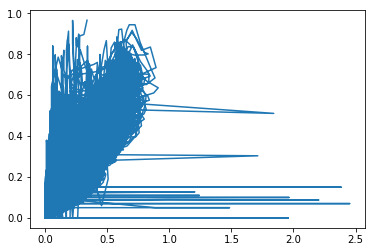

In [20]:
plt.plot(a['MonitorValue'],a['b'])

In [30]:
tt.reset_index(level=0,drop=True).reset_index()

,age1,age2,price
0,23,34,1200.0
1,32,32,5433.0
2,32,32,4432.0
3,34,34,NaN
4,44,24,NaN
5,54,100,2133.0


In [122]:
from datetime import datetime
tr = pd.date_range(start=pd.Timestamp("2015-06-01 16:19:00"),
                   end=pd.Timestamp("2015-06-01 16:50:00"), freq='1min')

In [123]:
d = {ai: pd.DataFrame(index=tr) for ai in a}

In [124]:
f = pd.concat(d)

In [125]:
f.index.names = list(df.index.names)

In [ ]:
df

In [144]:
# pd.merge(left=f, right=df, left_index=True, right_index=True, how='left')

In [3]:
_dates = ['2017-11-01 00:00:00','2017-11-27 00:00:00','2017-11-27 00:00:00','2017-11-29 00:00:00','2017-11-29 00:00:00','2017-11-30 00:00:00']

In [6]:
pred = pd.read_csv('./data/lstm_one_step_test/pred.csv')
pred['Time'] = pred['Time'].apply(lambda x: pd.Timestamp(x))

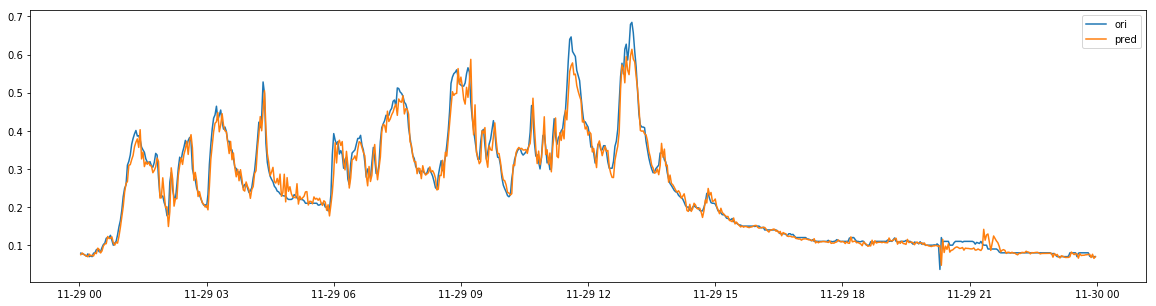

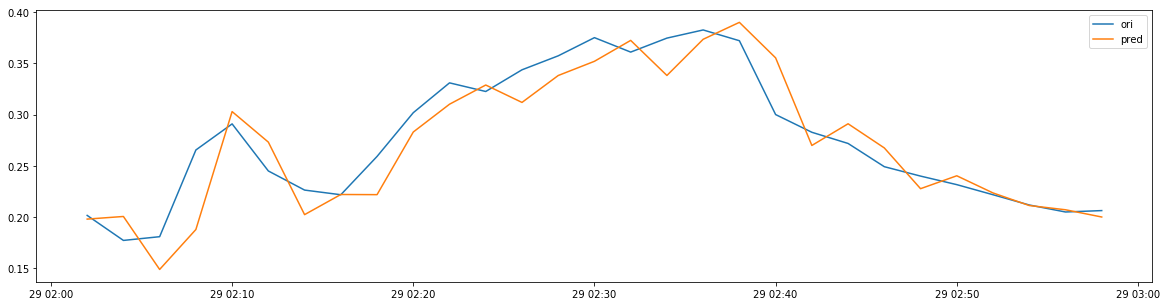

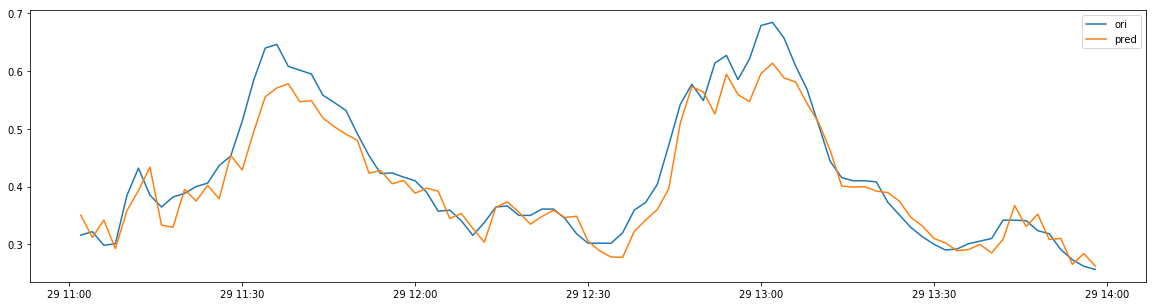

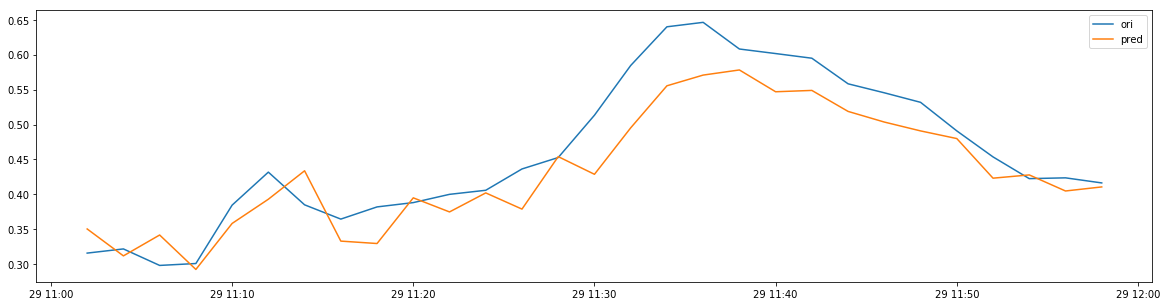

In [7]:
def plot_pred(pred, start,end):
    ttime = 'Time'
    pred = pred[(pred[ttime]>start) & (pred[ttime]<end)]
    plt.figure(figsize=(20, 5))
    plt.plot(pred['Time'], pred['ori'], label='ori')
    plt.plot(pred['Time'], pred['pred'], label='pred')
    plt.legend()
    plt.show()
plot_pred(pred, pd.Timestamp('2017-11-29 00:00:00'), pd.Timestamp('2017-11-30 00:00:00'))
plot_pred(pred, pd.Timestamp('2017-11-29 02:00:00'), pd.Timestamp('2017-11-29 03:00:00'))
plot_pred(pred, pd.Timestamp('2017-11-29 11:00:00'), pd.Timestamp('2017-11-29 14:00:00'))
plot_pred(pred, pd.Timestamp('2017-11-29 11:00:00'), pd.Timestamp('2017-11-29 12:00:00'))